In [1]:
%matplotlib inline
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.colors import DivergingNorm
# import matplotlib.backends.backend_pdf

In [2]:
# rnaseq_path = '/Users/osipova/Documents/LabDocs/Bird_transcriptomics/Transcriptome_for_NectarGenomics/'
# dir_path = '/Users/osipova/Documents/LabDocs/NectarivoryProject/absrel/absrel_analysis_2021/Metascape_enrich_4_lists/'
# dir_path = rnaseq_path + 'Intra_species_DESeq2_results/Metascape_enrichment/'
# dir_path =  rnaseq_path + 'DESeq2_results_Kallisto/Metascape_enrichment/'

bp_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
dir_path = bp_path + 'Metascape_enrichment/'

In [3]:
## load GO enrichment metascape results
## 
# file_name = 'noChildren.results_summary.rank_4.go_terms.pval.tsv'

# tissues = ['pect', 'liver', 'heart', 'duodenum']
# tissues = ['pectoralis', 'liver']
tissues = ['heart']

directions = ['up', 'down']
# directions = ['up']

# clade = 'nectar'
clade = 'nonnectar'

In [4]:
# cmap = sns.diverging_palette(250, 70, 123, 35, as_cmap=True)
# divnorm = DivergingNorm(np.log10(0.051))

for direction in directions:
    for tissue in tissues:

        ## Prepare in- and output files

        ## Metascape GO enrichment aBSREL rank 4 and children
    #     if tissue == 'pectoralis':
    #         file_name = 'validated.results_summary.rank_4.go_terms.pval.nonnectar.tsv'
    # #         file_name = 'noChildren.validated.results_summary.rank_4.go_terms.pval.tsv'
    #         direction = 'up'
    #         plot_name = 'metascape_absrel_results.4_lists.nonectar.pdf'
    #     elif tissue == 'liver':
    #         file_name = 'validated.children.results.go_terms.pval.tsv'
    #         direction = 'down'
    #         plot_name = 'metascape_absrel_results.4_lists.sorted.children.pdf'


        ## Metascape GO enrichment top 0.05 3 tissues DESeq pairwise
    #     file_name = '{}.{}.results_summary.rank_2.go_terms.pval.tsv'.format(direction, tissue)
        file_name = 'noChildren.metascape.{}_{}.tsv'.format(tissue, direction)
        plot_name = 'noChildren.metascape.{}_{}.pdf'.format(tissue, direction)

        ## Metascape GO enrichment INTRA species comparison: liver VS pect
#         file_name = 'noChildren.{}.{}.results_summary.rank_3.go_terms.pval.tsv'.format(clade, tissue)
#         file_name = '{}.{}.results_summary.rank_3.go_terms.pval.tsv'.format(clade, tissue)
#         if tissue == 'pectoralis':
#             direction = 'up'
#         elif tissue == 'liver':
#             direction = 'down'

        ## Load data
        print(dir_path + file_name)
        file_data = glob(dir_path + file_name)[0]
        df = pd.read_csv(file_data, sep='\t')
        df.set_index('Description', inplace=True)

        ## Prepare plotting palette
        if direction == 'up':
            cmap_pval = sns.diverging_palette(10, 240, as_cmap=True)
            cmap_pval = sns.diverging_palette(-70, 250, 123, 35, as_cmap=True)
            vmin = -3.5
#             vmin = -12.0
#             vmin = -10.0
        elif direction == 'down':
            cmap_pval = sns.diverging_palette(10, 240, as_cmap=True)  
            cmap_pval = sns.diverging_palette(-70, 250, 123, 35, as_cmap=True)
            vmin = -5.0
#             vmin = -8.0
#             vmin = -6.0
        else:
            print('specify correct direction of expression change: up/down')

        divnorm_pval = DivergingNorm(vmin=vmin, vmax=0, vcenter=np.log10(0.051))
        pval_cols = [i for i in df.columns if i.startswith('_LogP')]
        df_pval = df[pval_cols]

        ## Plot heatmap
        fig, axes = plt.subplots(figsize=(2.4, df_pval.shape[0] / 2))
        sns.heatmap(data=df_pval, cmap=cmap_pval, norm=divnorm_pval)
        axes.set_ylabel('')
        fig.tight_layout()
         
        ## INTRA species comparison
#         plot_name = '{}.{}.metascape_results.3_lists.sorted.pdf'.format(clade, tissue)


#         plt.savefig(plot_name, format='pdf', bbox_inches="tight")



/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/Metascape_enrichment/noChildren.metascape.heart_up.tsv


IndexError: list index out of range

In [5]:
# load data of Go terms you want to expand on
# file_name = 'children.results.go_terms.pval.tsv'

## BP
file_name = '3_clades.summary.GO.tsv'
file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')

df.set_index('Description', inplace=True)
df.head(3)

,_LogP_indInd,_LogP_vidCha,_LogP_vidMac,GO
Description,,,,
cilium organization,-4.331382,-4.845702,-4.307538,GO:0044782
microtubule cytoskeleton organization,-4.521142,-3.812152,-4.790841,GO:0000226
cilium assembly,-4.532377,-3.931638,-3.624840,GO:0060271


/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  
/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  after removing the cwd from sys.path.
/Users/osipova/local/Homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


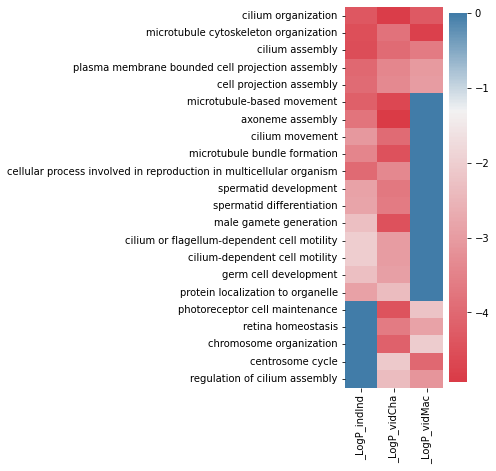

In [6]:
cmap = sns.diverging_palette(250, 70, 123, 35, as_cmap=True)
divnorm = DivergingNorm(np.log10(0.051))
cmap_pval = sns.diverging_palette(10, 240, as_cmap=True)
divnorm_pval = DivergingNorm(vmax=0, vcenter=np.log10(0.051))

pval_cols = [i for i in df.columns if i.startswith('_LogP')]
df_pval = df[pval_cols]

fig, axes = plt.subplots(figsize=(2.2, 7))
sns.heatmap(data=df_pval, cmap=cmap_pval, norm=divnorm_pval)
# axes.set_xticklabels(df_pval['GO'])
axes.set_ylabel('')

fig.tight_layout()

# pdf_name = 'children.metascape_absrel_results.4_lists.pdf'
pdf_name = 'metascape_MK_results.BP.3_clades.pdf'

# plt.savefig(pdf_name, format='pdf', bbox_inches="tight")

In [7]:
df_pval

,_LogP_indInd,_LogP_vidCha,_LogP_vidMac
Description,,,
cilium organization,-4.331382,-4.845702,-4.307538
microtubule cytoskeleton organization,-4.521142,-3.812152,-4.790841
cilium assembly,-4.532377,-3.931638,-3.624840
plasma membrane bounded cell projection assembly,-4.002535,-3.414201,-3.035716
cell projection assembly,-3.949696,-3.362796,-2.977727
microtubule-based movement,-4.175837,-4.660568,0.000000
axoneme assembly,-3.787235,-4.923765,0.000000
cilium movement,-3.056678,-3.947448,0.000000
microtubule bundle formation,-3.443263,-4.463644,0.000000
